_Importing necessary libraries_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
data=pd.read_csv("D:\swayam_Codes\week4\income.csv")
data_copy=data.copy()


In [3]:
data_copy.info()

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [4]:
#numerical variable
data.describe()

#categorical variable
data.describe(include='O')

#checking freq of categorical variable values
data['JobType'].value_counts()
data['occupation'].value_counts()

data_copy=pd.read_csv("D:\swayam_Codes\week4\income.csv",na_values=[" ?"])

data_copy.isnull().sum()

missing=data_copy[data_copy.isnull().any(axis=1)]

data2=data_copy.dropna(axis=0)


In [12]:

# Gender proportion table
gender=pd.crosstab(index=data2['gender'], columns='count',normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [7]:
salsata_gender=pd.crosstab(index=data2['gender'], columns=data2['SalStat'],margins=True,normalize='index')

print(salsata_gender)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


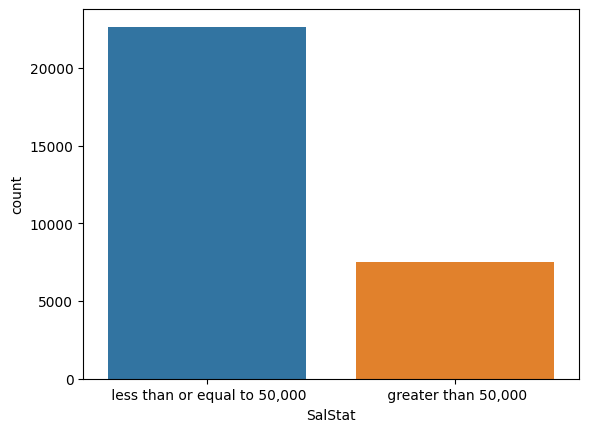

In [8]:
SalStat=sns.countplot(x=data2['SalStat'],data=data2)


<Axes: xlabel='SalStat', ylabel='age'>

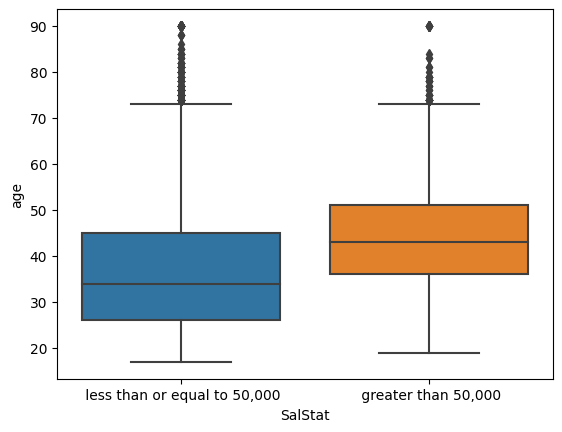

In [9]:
sns.boxplot(x='SalStat',y='age',data=data2)

In [10]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

_Logistic Regression_

In [13]:
#Converting  SalStat to binary
data2['SalStat']=data2['SalStat'].map({" less than or equal to 50,000":0," greater than 50,000":1})

#One hot encoding of features
new_data=pd.get_dummies(data2,drop_first=True)

cols=list(new_data.columns) 

feature=list(set(cols)-set(['SalStat']))

y=new_data['SalStat'].values

x=new_data[feature].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

logistic_model=LogisticRegression()

logistic_model.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6552\895952030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({" less than or equal to 50,000":0," greater than 50,000":1})
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

LogisticRegression()

In [14]:
pred=logistic_model.predict(x_test)

confusion_matrix(y_test,pred)

accuracy=accuracy_score(y_test,pred)

missclassified=(y_test!=pred).sum()


In [15]:
#Removing some features
column=['gender','nativecountry','race','JobType']
new_data=data2.drop(column,axis=1)

new_data=pd.get_dummies(new_data,drop_first=True)

colmn=list(new_data.columns)
features= list(set(colmn)-set(['SalStat']))

x=new_data[features].values
y=new_data['SalStat'].values

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

logistic=LogisticRegression()
logistic.fit(train_x,train_y)

prediction=logistic.predict(test_x)
confusion_mat=confusion_matrix(test_y, prediction)
accuracy_sc=accuracy_score(test_y,prediction)

miss_classified=(y_test!=pred).sum()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print(accuracy_sc)
print(miss_classified)

0.8337937893689911
1481


_KNN_

In [18]:
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

KNN=KNeighborsClassifier(n_neighbors=5)

KNN.fit(train_x,train_y)

predictions=KNN.predict(test_x)

con=confusion_matrix(test_y,predictions)
acc=accuracy_score(test_y,predictions)

miss=(predictions!=test_y).sum()


ageVSsal=pd.crosstab(index=data['SalStat'],columns=data['age'],normalize=True)


In [19]:
print(acc)

0.8344568460603382
